# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

# Select Directory

In [2]:
user      = 'adria'
os.chdir('C:\\Users\\'+str(user)+'\\Desktop\\Repo\\WirelessSensorNetwork\\Data\\V All')
extension = 'csv'

pri_filenames = [i for i in glob.glob('*Pri.{}'.format(extension))]
sec_filenames = [i for i in glob.glob('*Sec.{}'.format(extension))]

In [4]:
#pri_filenames, sec_filenames
#print(pri_df)
#print(sec_df)
#pri_df.head()

# Define Functions

In [5]:
def avg_func(df, window, start, end):
    new_df = df.rolling(window, min_periods=1).mean()
    new_df = new_df.assign(date = pd.to_datetime(new_df.unixtime, unit = 's').dt.strftime('%m/%d/%Y %H:%M'))
    new_df = new_df.iloc[start:end]
    return new_df

In [6]:
def wd_offset_func(wind_dir, offset):
    new_dir = wind_dir + offset
    if new_dir > 360:
        new_dir = new_dir - 360
    elif new_dir < 1:
        new_dir = new_dir + 360
    return new_dir

In [7]:
def stats_func(df):
    print('Unix Min:', df['unixtime'].min())
    print('Unix Max:', df['unixtime'].max())
    
    print('Date Min:', df['date'].min())
    print('Date Max:', df['date'].max())

    print('CO2 Min:', df['co2'].min())
    print('CO2 Max:', df['co2'].max())
    print('CO2 Avg:', df['co2'].mean())
    print()
    
    plt.plot(df['co2'], 'lime')
    #plt.plot(df['co2'].iloc[173090:173110], 'ro')
    ax = plt.gca()
    ax.tick_params(axis='x', colors='white') 
    ax.tick_params(axis='y', colors='white') 
    plt.show()
    #plt.plot(df['temp'], 'red')
    #ax = plt.gca()
    #ax.tick_params(axis='x', colors='white') 
    #ax.tick_params(axis='y', colors='white') 
    #plt.show()

# Call Functions

In [ ]:
pri_df = pd.concat(map(pd.read_csv, pri_filenames), ignore_index = True)
pri_df['wd'] = pri_df['wd'].apply(wd_offset_func, args = (20,))
#pri_df.loc[170000:-1, 'co2'] = pri_df.loc[170000:-1, 'co2'] - 400
pri_df = avg_func(pri_df, 20, 0, -1)
#pri_df['co2'].iloc[174000:-1] = pri_df['co2'].iloc[174000:-1]-660
#pri_df['co2'].iloc[173106:-1] = pri_df['co2'].iloc[173106:-1]-660
#pri_df['co2'].iloc[173107:-1] = pri_df['co2'].iloc[173107:-1]-660
#pri_df['co2'].iloc[173099:-1] = pri_df['co2'].iloc[173099:-1]-660
#pri_avg = avg_func(pri_df, 20, 100000, 200000)
#pri_avg = avg_func(pri_df, 20, 0, 170000)
stats_func(pri_df)

Unix Min: 1625605514
Unix Max: 1625851496
Date Min: 7/6/2021 21:05
Date Max: 7/9/2021 9:59
CO2 Min: 0
CO2 Max: 1151
CO2 Avg: 359.5896944935667



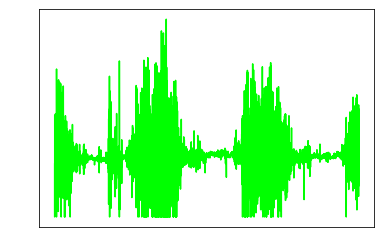

In [9]:
sec_df = pd.concat(map(pd.read_csv, sec_filenames), ignore_index = True)
sec_df['wd'] = sec_df['wd'].apply(wd_offset_func, args = (45,))

#sec_df = avg_func(sec_df, 20, 0, -1)
#sec_df = avg_func(sec_df, 20, 100000, 200000)
#sec_df = avg_func(sec_df, 20, 0, 170000)
stats_func(sec_df)

# Export DataFrame

In [10]:
#pri_df.to_csv('Pri-Processed.csv', index=False, encoding='utf-8-sig')
sec_df.to_csv('Sec-Processed.csv', index=False, encoding='utf-8-sig')